<a href="https://colab.research.google.com/github/Kumarstar123/mlbootcamp2025/blob/main/4_DataScience_TakeHome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement

#### Using 'transaction history' and 'grocery inventory' (imported in below code snippets), answer the questions below:


In [287]:
import json
import os
import pandas as pd
import requests
from IPython.display import display # Import display
import matplotlib.pyplot as plt # added this, for histrogram plot
import numpy as np # added this, for adjusting interval ticks on bar chart (y axis) for displaing total amount of each item bought after all transactions

In [288]:
# Fetch the JSON 'grocery inventory' data from the URL
url = 'https://raw.githubusercontent.com/shashankbl/mlbootcamp2025flc/main/extras/grocery_inventory.json'  # Use 'raw.githubusercontent.com'
try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"Error fetching JSON from URL: {e}")
    data = {}  # Initialize as empty dictionary in case of error

# Convert the JSON data to a Pandas DataFrame
try:
    inventory_df = pd.DataFrame(data)
    display(inventory_df) # Display the DataFrame using display() for pretty print
except (ValueError, KeyError) as e:
    print(f"Error converting JSON to DataFrame: {e}")
    if data:
        print("JSON data loaded but could not be formatted as a table")

,item,category,quantity,unit_cost,max_quantity
0,tomato,vegetable,1000,0.10,10
1,apple,fruit,504,0.25,5
2,orange,fruit,400,0.05,10
3,strawberry,fruit,430,0.08,15
4,onion,vegetable,254,0.20,8
5,carrot,vegetable,204,0.05,15
6,pepper,vegetable,540,0.10,15
7,eggplant,vegetable,150,0.30,5
8,broccoli,vegetable,167,2.50,2
9,beans,vegetable,135,2.00,3


In [289]:
# Fetch the JSON 'transaction history' data from the URL
url = 'https://raw.githubusercontent.com/shashankbl/mlbootcamp2025flc/main/extras/transaction_history.json'  # Use 'raw.githubusercontent.com'
try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"Error fetching JSON from URL: {e}")
    data = {}  # Initialize as empty dictionary in case of error

# Convert the JSON data to a Pandas DataFrame
try:
    transaction_df = pd.DataFrame(data)
    display(transaction_df) # Display the DataFrame using display() for pretty print
except (ValueError, KeyError) as e:
    print(f"Error converting JSON to DataFrame: {e}")
    if data:
        print("JSON data loaded but could not be formatted as a table")

,id,customer,date,quantities,transaction_duration
0,0001,bob,"[2025, 1, 10]","{'apple': 6, 'milk': 2, 'orange': 10}",12.5
1,0002,martha,"[2025, 1, 10]","{'strawberry': 16, 'milk': 3}",2.5
2,0003,zed,"[2025, 1, 10]","{'milk': 6, 'yogurt': 4, 'mochi': 5}",4
3,0004,frank,"[2025, 1, 10]","{'onion': 10, 'carrot': 13, 'milk': 3, 'strawb...",6.5
4,0005,bob,"[2025, 1, 10]","{'onion': 20, 'carrot': 8, 'milk': 1, 'strawbe...",12.5
5,0006,suzy,"[2025, 1, 10]","{'eggplant': 6, 'apple': 2}",10.5
6,0007,mia,"[2025, 1, 11]","{'apple': 6, 'milk': 2, 'beans': 12, 'mochi': 4}",12.5
7,0008,mick,"[2025, 1, 11]","{'cheese': 8, 'mochi': 4}",4.5
8,0009,bruce,"[2025, 1, 11]","{'apple': 8, 'milk': 1, 'eggplant': 4}",3.5
9,0010,frank,"[2025, 1, 11]","{'soda': 16, 'milk': 12}",9.5


**NOTE:**
- You are allowed to format the dataframes as you prefer.
- You are encouraged to also optimize/improve the code snippets provided.
- You can import other libraries required for the analysis and visualization.
- Write conclusions/answers for each question in a 'text cell'.

### Calculate the value of prior transactions.

In [290]:
unitPrices = inventory_df["unit_cost"]
itemNames = inventory_df["item"]
maxQuantities = inventory_df["max_quantity"]

customerNames = transaction_df["customer"]
transactionDates = transaction_df["date"]
transactionDurations = transaction_df["transaction_duration"]

# A Series in Python (from the Pandas library) is a one-dimensional labeled array that can hold any data type,
# such as integers, floats, strings, or even objects.

unitPricesList = unitPrices.tolist() # convert Series object to list
itemNamesList = itemNames.tolist()
customerNamesList = customerNames.tolist()
maxQuantitiesList = maxQuantities.tolist()
transactionDatesList = transactionDates.tolist()
transactionDurationsList = transactionDurations.tolist()

# for i in range(0, len(unitPricesList)):
#   print("i:", i, "customerNamesList[i]:", customerNamesList[i])
#   print("i:", i, "unitPricesList[i]:", unitPricesList[i])
#   print("i:", i, "itemNamesList[i]:", itemNamesList[i])
#   print("i:", i, "transactionDurationsList[i] (in minutes):", transactionDurationsList[i])
#   print("========================================================")


In [291]:

# make a new dict that will store the item names as keys, and the unit cost of the items as values
itemNamesUnitPricesDict = {}

# The zip() function in Python combines multiple iterables such as lists, tuples, strings, dict etc, into a single iterator of tuples.
# dict(): function that creates a dictionary
# Use the update method to add items to the existing dictionary
itemNamesUnitPricesDict.update(zip(itemNamesList, unitPricesList))

#display(itemNamesUnitPricesDict)

In [292]:
# Write code here...

# transactionQuantitiesList = transaction_df["quantities"].tolist()  # Convert to a list
transactionQuantities = transaction_df["quantities"]
transactionQuantitiesList = transactionQuantities.tolist()  # Convert to a list

#print(transactionQuantities)
#display(transactionQuantitiesList)


In [293]:
totalCostOfAllTransactions = 0

itemsBoughtDict = {} # create a dictionary to hold the total quantity of each item bought (will be used for very last question at the end)

transactionsList = transaction_df["quantities"].tolist()

costList = [] # list that will store the cost of each transaction

loopIndex = 0

for dictionary in transactionQuantitiesList:
  transaction = dictionary

  print(f"customer name: {customerNamesList[loopIndex]}, current transaction: {transaction}")
  print()

  tempTransactionCost = 0

  for item, quantity in transaction.items():
    if item in itemNamesUnitPricesDict:  # Ensure the item has a known price
      print(f"item: {item}, quantity: {quantity}, unitPrice: {itemNamesUnitPricesDict[item]}")

      tempItemCost = round( (itemNamesUnitPricesDict[item] * quantity), 2)
      print(f"cost for {quantity} {item} is: ${tempItemCost}")

      tempTransactionCost += round(tempItemCost,2)
      totalCostOfAllTransactions += tempItemCost
      print()

    if item in itemsBoughtDict: # check if item already in the dict or not
      itemsBoughtDict[item] += quantity
    else: # If not already in dict, create a new key-value pair for item
      itemsBoughtDict[item] = quantity

  print(f"Total cost of this transaction: ${round(tempTransactionCost,2)}")
  print("================================================================================================================")
  loopIndex += 1
  costList.append(tempTransactionCost)


print(f"\nTotal cost of ALL transactions: ${totalCostOfAllTransactions}")



customer name: bob, current transaction: {'apple': 6, 'milk': 2, 'orange': 10}

item: apple, quantity: 6, unitPrice: 0.25
cost for 6 apple is: $1.5

item: milk, quantity: 2, unitPrice: 3.5
cost for 2 milk is: $7.0

item: orange, quantity: 10, unitPrice: 0.05
cost for 10 orange is: $0.5

Total cost of this transaction: $9.0
customer name: martha, current transaction: {'strawberry': 16, 'milk': 3}

item: strawberry, quantity: 16, unitPrice: 0.08
cost for 16 strawberry is: $1.28

item: milk, quantity: 3, unitPrice: 3.5
cost for 3 milk is: $10.5

Total cost of this transaction: $11.78
customer name: zed, current transaction: {'milk': 6, 'yogurt': 4, 'mochi': 5}

item: milk, quantity: 6, unitPrice: 3.5
cost for 6 milk is: $21.0

item: yogurt, quantity: 4, unitPrice: 5.0
cost for 4 yogurt is: $20.0

item: mochi, quantity: 5, unitPrice: 1.5
cost for 5 mochi is: $7.5

Total cost of this transaction: $48.5
customer name: frank, current transaction: {'onion': 10, 'carrot': 13, 'milk': 3, 'strawb

In [294]:
#transaction_df.info()

In [295]:
#transaction_df.head(10)

In [296]:
#transaction_df.describe()

### How many transactions violated the 'max quantities' rule?

In [297]:
# Write code here...

maxQuantitiesOfItemsDict = {}

maxQuantitiesOfItemsDict.update((zip(itemNamesList,maxQuantitiesList)))

#display(maxQuantitiesOfItemsDict)


In [298]:


loopIndex = 0
totalNumberOfMaxQuantityViolations = 0

for dictionary in transactionQuantitiesList:
  transaction = dictionary

  print(f"customer name: {customerNamesList[loopIndex]}, current transaction: {transaction}")
  print()

  for item, quantity in transaction.items():
    if item in itemNamesUnitPricesDict:  # Ensure the item has a known price
      print(f"item: {item}, quantity: {quantity}, unitPrice: {itemNamesUnitPricesDict[item]}, maxQuantity: {maxQuantitiesOfItemsDict[item]}")

      if(quantity > maxQuantitiesOfItemsDict[item]):
        print(f"OOPS! You have more than the max number of {item}s per transaction.")
        totalNumberOfMaxQuantityViolations += 1
    print()

  print("================================================================================================================")
  loopIndex += 1

print(f"\nTotal number of max quantity violations: {totalNumberOfMaxQuantityViolations}")


customer name: bob, current transaction: {'apple': 6, 'milk': 2, 'orange': 10}

item: apple, quantity: 6, unitPrice: 0.25, maxQuantity: 5
OOPS! You have more than the max number of apples per transaction.

item: milk, quantity: 2, unitPrice: 3.5, maxQuantity: 3

item: orange, quantity: 10, unitPrice: 0.05, maxQuantity: 10

customer name: martha, current transaction: {'strawberry': 16, 'milk': 3}

item: strawberry, quantity: 16, unitPrice: 0.08, maxQuantity: 15
OOPS! You have more than the max number of strawberrys per transaction.

item: milk, quantity: 3, unitPrice: 3.5, maxQuantity: 3

customer name: zed, current transaction: {'milk': 6, 'yogurt': 4, 'mochi': 5}

item: milk, quantity: 6, unitPrice: 3.5, maxQuantity: 3
OOPS! You have more than the max number of milks per transaction.

item: yogurt, quantity: 4, unitPrice: 5.0, maxQuantity: 5

item: mochi, quantity: 5, unitPrice: 1.5, maxQuantity: 5

customer name: frank, current transaction: {'onion': 10, 'carrot': 13, 'milk': 3, 'str

### Track the popularity of items in the grocery store by factoring the transaction quantities (histogram representation)


In [299]:
# Write code here...


loopIndex = 0
itemsTransactionQuantitiesDict = {} # create a dictionary to hold the total quantity of each item bought

for dictionary in transactionQuantitiesList:
  transaction = dictionary

  print(f"customer name: {customerNamesList[loopIndex]}, current transaction: {transaction}")
  print()

  for item, quantity in transaction.items():
    if item in itemNamesUnitPricesDict:  # Ensure the item has a known price
      print(f"item: {item}, quantity: {quantity}, unitPrice: {itemNamesUnitPricesDict[item]}, maxQuantity: {maxQuantitiesOfItemsDict[item]}")

      if item in itemsTransactionQuantitiesDict: # check if item already in the dict or not
        itemsTransactionQuantitiesDict[item] += quantity
      else: # If not already in dict, create a new key-value pair for item
        itemsTransactionQuantitiesDict[item] = quantity

    print()

  print("================================================================================================================")
  loopIndex += 1

display(itemsTransactionQuantitiesDict)


customer name: bob, current transaction: {'apple': 6, 'milk': 2, 'orange': 10}

item: apple, quantity: 6, unitPrice: 0.25, maxQuantity: 5

item: milk, quantity: 2, unitPrice: 3.5, maxQuantity: 3

item: orange, quantity: 10, unitPrice: 0.05, maxQuantity: 10

customer name: martha, current transaction: {'strawberry': 16, 'milk': 3}

item: strawberry, quantity: 16, unitPrice: 0.08, maxQuantity: 15

item: milk, quantity: 3, unitPrice: 3.5, maxQuantity: 3

customer name: zed, current transaction: {'milk': 6, 'yogurt': 4, 'mochi': 5}

item: milk, quantity: 6, unitPrice: 3.5, maxQuantity: 3

item: yogurt, quantity: 4, unitPrice: 5.0, maxQuantity: 5

item: mochi, quantity: 5, unitPrice: 1.5, maxQuantity: 5

customer name: frank, current transaction: {'onion': 10, 'carrot': 13, 'milk': 3, 'strawberry': 12}

item: onion, quantity: 10, unitPrice: 0.2, maxQuantity: 8

item: carrot, quantity: 13, unitPrice: 0.05, maxQuantity: 15

item: milk, quantity: 3, unitPrice: 3.5, maxQuantity: 3

item: strawb

{'apple': 76,
 'milk': 54,
 'orange': 10,
 'strawberry': 84,
 'yogurt': 4,
 'mochi': 31,
 'onion': 86,
 'carrot': 77,
 'eggplant': 26,
 'beans': 32,
 'cheese': 8,
 'soda': 50,
 'tomato': 6,
 'pepper': 6}

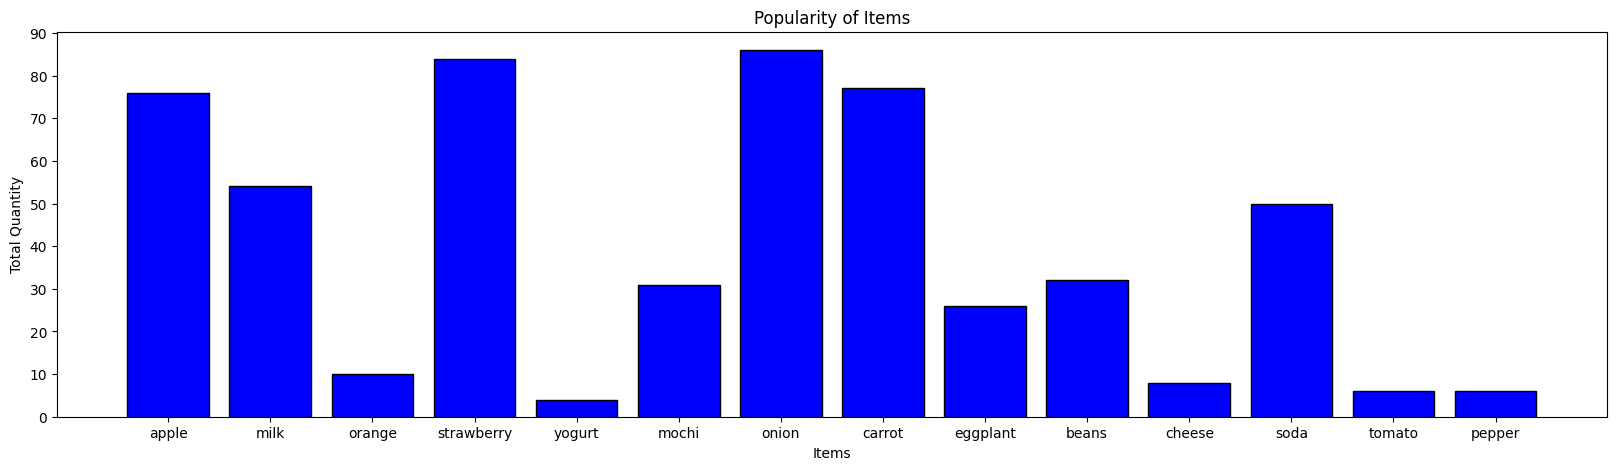

In [300]:
# plt.bar(keys, values, color='blue', edgecolor='black')

plt.figure(figsize=(20, 5))  # Adjusts overall figure width & height for bar chart

plt.bar(itemsTransactionQuantitiesDict.keys(), itemsTransactionQuantitiesDict.values(), color='blue', edgecolor='black')

# Set y-axis ticks at intervals of 10
plt.yticks(np.arange(0, max(itemsTransactionQuantitiesDict.values()) + 10, step=10))

plt.xlabel('Items')
plt.ylabel('Total Quantity')
plt.title('Popularity of Items')
plt.show()

### Average transaction per day (ignore days with no transaction as they were holidays)

In [301]:
# Write code here...
transactionDatesDict = {} # create a dictionary to hold the dates of each transaction

#display(transactionDatesList)

for date in transactionDatesList:
  #print(date)

  # NOTE: need to convert the date (which is in a list format) to a tuple so it is "hashable"
  # Tuples are immutable, meaning they cannot be changed after creation.
  # Since they are immutable, they have a fixed hash value and can be used as dictionary keys.
  tempTuple = tuple(date)

  if tempTuple in transactionDatesDict: # check if the date already exists in the dict or not
    transactionDatesDict[tempTuple] += 1

  else: # If not already in dict, create a new key-value pair for date
    transactionDatesDict[tempTuple] = 1

#display(transactionDatesDict)


In [302]:
totalNumOfTransactions = 0

for key, value in transactionDatesDict.items():
  print(f"Date: {key}, Number of Transactions: {value}")
  totalNumOfTransactions += value

print(f"\nTotal number of transactions: {totalNumOfTransactions}")

averageNumOfTransactionsPerDay = totalNumOfTransactions / len(transactionDatesDict)
print(f"Average number of transactions per day: {round(averageNumOfTransactionsPerDay,3)}")

Date: (2025, 1, 10), Number of Transactions: 6
Date: (2025, 1, 11), Number of Transactions: 6
Date: (2025, 1, 12), Number of Transactions: 9
Date: (2025, 1, 13), Number of Transactions: 2
Date: (2025, 1, 14), Number of Transactions: 1
Date: (2025, 1, 15), Number of Transactions: 2
Date: (2025, 1, 18), Number of Transactions: 3

Total number of transactions: 29
Average number of transactions per day: 4.143


### Identify the three least efficient transactions and three most efficient transactions (based on revenue/min metric)

In [303]:
# print(transactionsList)
# print()
# print(costList)
# print()
# print(transactionDurationsList)

In [304]:
transactionEfficiencyList = [] # list that will store the efficiency of each transaction ()

# print(len(transactionsList))
# print(len(costList))

# calculate the efficiency for each transation (cost/min)
for i in range(0, len(transactionsList)):
  transactionEfficiencyList.append(costList[i] / float(transactionDurationsList[i]) )

# print(transactionEfficiencyList)
# print()
# print(len(transactionEfficiencyList))

In [305]:
roundedTransactionEfficiencyList = [round(num, 3) for num in transactionEfficiencyList]
# print(roundedTransactionEfficiencyList)
# print()
# print(customerNamesList)
# print()
# print(transactionsList)
# print()
# print(costList)


In [306]:
# Make sure all lists are same length

# print(len(roundedTransactionEfficiencyList))
# print(len(customerNamesList))
# print(len(transactionsList))


In [307]:
# 1) Prepare Data:
# As before, zip together the customer names, efficiency list, transaction details, and cost list into a list of tuples.
data = list(zip(customerNamesList, roundedTransactionEfficiencyList, transactionsList, costList))


In [308]:
all_transactions = [] # list

for name, efficiency, transaction, cost in data:
    # Assuming total cost is given directly
    efficiency_per_transaction = cost / efficiency  # Calculate efficiency per transaction
    all_transactions.append({
        'customer': name,
        'transaction': transaction,
        'cost': cost,
        'efficiency': efficiency_per_transaction
    })

# Sort all transactions by efficiency (from highest to lowest). This is a list.
sorted_transactions = sorted(all_transactions, key=lambda x: x['efficiency'], reverse=True)

# Get the 3 most and least efficient transactions by slicing from sorted_transactions list
top_3 = sorted_transactions[:3]
bottom_3 = sorted_transactions[-3:]

In [309]:
print("top 3 most efficient transactions:")

for i in range(0,3):
  print(f"customer: {top_3[i]['customer']}, transaction: {top_3[i]['transaction']}, cost: {top_3[i]['cost']}, efficiency: {top_3[i]['efficiency']}")


top 3 most efficient transactions:
customer: steve, transaction: {'strawberry': 16, 'soda': 12, 'carrot': 4, 'eggplant': 6, 'mochi': 3}, cost: 28.78, efficiency: 15.498115239633819
customer: bob, transaction: {'onion': 20, 'carrot': 8, 'milk': 1, 'strawberry': 18}, cost: 9.34, efficiency: 12.50334672021419
customer: bob, transaction: {'apple': 6, 'milk': 2, 'orange': 10}, cost: 9.0, efficiency: 12.5


In [310]:
print("top 3 least efficient transactions:")

for i in range(0,3):
  print(f"customer: {bottom_3[i]['customer']}, transaction: {bottom_3[i]['transaction']}, cost: {bottom_3[i]['cost']}, efficiency: {bottom_3[i]['efficiency']}")

top 3 least efficient transactions:
customer: star, transaction: {'apple': 4, 'milk': 2}, cost: 8.0, efficiency: 2.5
customer: suzy, transaction: {'beans': 2, 'onion': 6}, cost: 5.2, efficiency: 2.0
customer: martha, transaction: {'apple': 6, 'milk': 2}, cost: 8.5, efficiency: 1.4999117698958886


### Create a visualization of individual items sold over time

In [311]:
# Write code here...
# print(transactionsList)
# print(transactionDatesList)

In [312]:
# Convert to datetime format
dates = pd.to_datetime([pd.Timestamp(year=year, month=month, day=day)
                        for year, month, day in transactionDatesList])

# Combine all the data into a DataFrame
data_df = pd.DataFrame({
    'date': dates,
    'customer': customerNamesList,
    'efficiency': efficiency,
    'transaction': transactionsList  # Store each transaction as a dictionary
})

data_df.head(29)

,date,customer,efficiency,transaction
0,2025-01-10,bob,1.556,"{'apple': 6, 'milk': 2, 'orange': 10}"
1,2025-01-10,martha,1.556,"{'strawberry': 16, 'milk': 3}"
2,2025-01-10,zed,1.556,"{'milk': 6, 'yogurt': 4, 'mochi': 5}"
3,2025-01-10,frank,1.556,"{'onion': 10, 'carrot': 13, 'milk': 3, 'strawb..."
4,2025-01-10,bob,1.556,"{'onion': 20, 'carrot': 8, 'milk': 1, 'strawbe..."
5,2025-01-10,suzy,1.556,"{'eggplant': 6, 'apple': 2}"
6,2025-01-11,mia,1.556,"{'apple': 6, 'milk': 2, 'beans': 12, 'mochi': 4}"
7,2025-01-11,mick,1.556,"{'cheese': 8, 'mochi': 4}"
8,2025-01-11,bruce,1.556,"{'apple': 8, 'milk': 1, 'eggplant': 4}"
9,2025-01-11,frank,1.556,"{'soda': 16, 'milk': 12}"


### Based on the transaction history, calculate the total inventory at store opening (prior transaction quantities + current inventory quantities)

In [313]:
# Write code here...

print(itemsBoughtDict)

{'apple': 76, 'milk': 54, 'orange': 10, 'strawberry': 84, 'yogurt': 4, 'mochi': 31, 'onion': 86, 'carrot': 77, 'eggplant': 26, 'beans': 32, 'cheese': 8, 'soda': 50, 'tomato': 6, 'pepper': 6}


In [314]:
display(inventory_df)

,item,category,quantity,unit_cost,max_quantity
0,tomato,vegetable,1000,0.10,10
1,apple,fruit,504,0.25,5
2,orange,fruit,400,0.05,10
3,strawberry,fruit,430,0.08,15
4,onion,vegetable,254,0.20,8
5,carrot,vegetable,204,0.05,15
6,pepper,vegetable,540,0.10,15
7,eggplant,vegetable,150,0.30,5
8,broccoli,vegetable,167,2.50,2
9,beans,vegetable,135,2.00,3


In [315]:
currentInventoryItemQuantities = inventory_df['quantity']
currentInventoryItemQuantitiesList = currentInventoryItemQuantities.tolist() # convert to list format

print(itemNamesList)
print(currentInventoryItemQuantitiesList)

['tomato', 'apple', 'orange', 'strawberry', 'onion', 'carrot', 'pepper', 'eggplant', 'broccoli', 'beans', 'milk', 'yogurt', 'cheese', 'icecream', 'mochi', 'soda', 'sparkling_water']
[1000, 504, 400, 430, 254, 204, 540, 150, 167, 135, 254, 160, 285, 150, 170, 240, 286]


In [316]:
currentInventoryItemQuantitiesDict = {}
currentInventoryItemQuantitiesDict.update((zip(itemNamesList,currentInventoryItemQuantitiesList))) # combine to the lists together into a dict

print("Total quanitity of each item currently in inventory:")
print()
display(currentInventoryItemQuantitiesDict)

Total quanitity of each item currently in inventory:



{'tomato': 1000,
 'apple': 504,
 'orange': 400,
 'strawberry': 430,
 'onion': 254,
 'carrot': 204,
 'pepper': 540,
 'eggplant': 150,
 'broccoli': 167,
 'beans': 135,
 'milk': 254,
 'yogurt': 160,
 'cheese': 285,
 'icecream': 150,
 'mochi': 170,
 'soda': 240,
 'sparkling_water': 286}

In [317]:
loopIndex = 0 # to access elements from currentInventoryItemQuantitiesList()
for key, value in currentInventoryItemQuantitiesDict.items():
  print(f"BEFORE...Item: {key}, Quantity: {value}") # Prints both key and value

  currentInventoryItemQuantitiesDict[key] += currentInventoryItemQuantitiesList[loopIndex]

  print()
  print(f"Adding {currentInventoryItemQuantitiesList[loopIndex]} {key} based on prior transaction quanitites...")
  print()
  print(f"AFTER...Item: {key}, Quantity: {currentInventoryItemQuantitiesDict[key]}") # Prints both key and value

  print("=============================================")
  loopIndex += 1


BEFORE...Item: tomato, Quantity: 1000

Adding 1000 tomato based on prior transaction quanitites...

AFTER...Item: tomato, Quantity: 2000
BEFORE...Item: apple, Quantity: 504

Adding 504 apple based on prior transaction quanitites...

AFTER...Item: apple, Quantity: 1008
BEFORE...Item: orange, Quantity: 400

Adding 400 orange based on prior transaction quanitites...

AFTER...Item: orange, Quantity: 800
BEFORE...Item: strawberry, Quantity: 430

Adding 430 strawberry based on prior transaction quanitites...

AFTER...Item: strawberry, Quantity: 860
BEFORE...Item: onion, Quantity: 254

Adding 254 onion based on prior transaction quanitites...

AFTER...Item: onion, Quantity: 508
BEFORE...Item: carrot, Quantity: 204

Adding 204 carrot based on prior transaction quanitites...

AFTER...Item: carrot, Quantity: 408
BEFORE...Item: pepper, Quantity: 540

Adding 540 pepper based on prior transaction quanitites...

AFTER...Item: pepper, Quantity: 1080
BEFORE...Item: eggplant, Quantity: 150

Adding 150 

In [318]:
print("Total inventory at store opening. (prior transaction quantities + current inventory quantities)...")
print()
display(currentInventoryItemQuantitiesDict)

Total inventory at store opening. (prior transaction quantities + current inventory quantities)...



{'tomato': 2000,
 'apple': 1008,
 'orange': 800,
 'strawberry': 860,
 'onion': 508,
 'carrot': 408,
 'pepper': 1080,
 'eggplant': 300,
 'broccoli': 334,
 'beans': 270,
 'milk': 508,
 'yogurt': 320,
 'cheese': 570,
 'icecream': 300,
 'mochi': 340,
 'soda': 480,
 'sparkling_water': 572}